Yes, it is possible to use Principal Component Analysis (PCA) to reduce the dimensionality of images from the MNIST dataset. PCA is a statistical technique that transforms data to a new coordinate system where the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. By keeping only the most significant principal components, you can reduce the dimensionality of the data while retaining most of the variance (information).

Below is Python code that demonstrates how to apply PCA to the MNIST dataset to reduce the dimensionality of the images. This example reduces the dimensionality from 784 features (28x28 pixels) to 64 principal components.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist.data  # Feature matrix (70000 samples, 784 features)
y = mnist.target.astype(int)  # Labels (digits 0-9)

In [6]:
X.mean(), X.std()

(np.float64(33.385964741253645), np.float64(78.65437362689433))

In [3]:
# Standardize the data
# PCA is effected by scale, so it's important to standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled.mean(), X_scaled.std()

(np.float64(-1.2072825732320548e-18), np.float64(0.9576491198422799))

In [6]:
# Apply PCA to reduce the dimensionality
n_components = 64  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)  # The reduced data matrix

In [7]:
# Inverse transform to reconstruct the images from the PCA components
X_reconstructed = pca.inverse_transform(X_pca)

Original images:


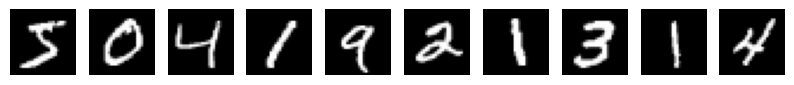

Reconstructed images from the first 64 principal components:


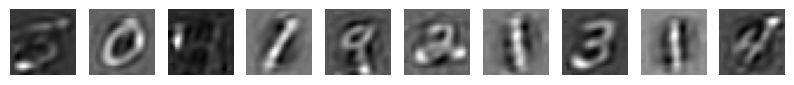

In [8]:
# Function to plot images
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    plt.figure(figsize=(images_per_row, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, images_per_row, index + 1)
        plt.imshow(image, cmap="gray", **options)
        plt.axis("off")
    plt.show()


# Plot original images
print("Original images:")
plot_digits(X[0:10])

# Plot reconstructed images
print(
    "Reconstructed images from the first {} principal components:".format(n_components)
)
plot_digits(X_reconstructed[0:10])

**Explanation of the code:**

1. **Data Loading:**
   - We use `fetch_openml` to load the MNIST dataset. This dataset contains 70,000 images of handwritten digits, each image being 28x28 pixels (flattened into a 784-dimensional vector).

2. **Data Standardization:**
   - PCA is sensitive to the relative scaling of the original variables. We standardize the data using `StandardScaler` so that each feature has mean 0 and variance 1.

3. **Applying PCA:**
   - We create a `PCA` object specifying the number of principal components we want to keep (`n_components=64`).
   - The `fit_transform` method computes the principal components and projects the original data onto these components, resulting in a reduced data matrix `X_pca`.

4. **Reconstructing Images:**
   - We use the `inverse_transform` method to map the reduced data back to the original space. This helps us visualize how much information was retained after dimensionality reduction.

5. **Visualization:**
   - The `plot_digits` function displays a set of images.
   - We plot the first 10 original images and their reconstructed counterparts to compare them.

**Visualizing Variance Explained:**

You might also want to understand how much variance is retained with the selected number of principal components. Here's how you can plot the cumulative explained variance ratio:

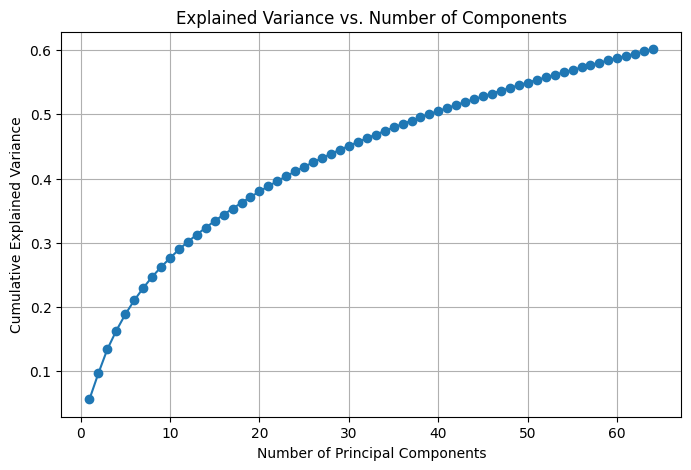

In [9]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, n_components + 1), cumulative_variance, marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

This plot will help you decide how many principal components you need to retain a desired amount of variance.

**Notes:**

- **Choosing `n_components`:** The number of components to keep depends on the trade-off between dimensionality reduction and the amount of variance (information) you want to retain. You can adjust `n_components` based on the explained variance ratio.

- **Performance Considerations:** Working with the full MNIST dataset can be computationally intensive. If you run into performance issues, consider using a subset of the data for experimentation:

In [ ]:
# Use a subset of the data for faster computation
X_subset = X_scaled[:5000]  # Use the first 5000 samples
y_subset = y[:5000]
# Then apply PCA on X_subset instead of X_scaled

- **Use in Machine Learning Pipelines:** Dimensionality reduction with PCA can be particularly useful as a preprocessing step in machine learning pipelines to speed up training and reduce overfitting.

**Understanding the Output:**

- **Original vs. Reconstructed Images:** After applying PCA and then reconstructing the images, you will notice that while some details are lost, the general shape and structure of the digits are preserved. This demonstrates that the PCA has captured the most significant features of the data.

- **Explained Variance:** The explained variance ratio indicates how much information (variance) is contained in each principal component. By summing up the explained variance of the components you've kept, you can see the total variance retained.

Feel free to adjust the number of principal components and observe how it affects the reconstructed images and the explained variance.